In [48]:
import re
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

In [26]:
p1=re.compile("Longest Blockchain Length: (\d*)")
p2=re.compile("generate a block with parent height: (\d*)")

def process_one(filename):
    last_longest = None
    attack_forking_start = None
    attack_success = None
    with open(filename) as fin:
        for i, line in enumerate(fin):
            result = p1.search(line)
            if result is not None:
                last_longest = (i, int(result.group(1)) )
#                 print(last_longest)
            result = p2.search(line)
            if result is not None:
                parent = int(result.group(1))
                if attack_forking_start is None:
                    attack_forking_start = parent
#                     print("ATT",attack_forking_start)
                attack_forking_length = parent+1
                if last_longest[0]+3!=i:
                    print(filename,"Wrong ling +3",i,last_longest[0])
                if attack_forking_length >= last_longest[1]:
                    #attack success
                    attack_success = attack_forking_length
    return attack_forking_start, attack_success

In [27]:
filepath='private_attack_experiment_1/'
matrix = np.zeros((11,11))
for betas in range(11):
    for betaw in range(11):
        if betas+betaw==0:
            continue
        b1=betas/10
        b2=betaw/10
        attack_forking_start, attack_success = process_one(filepath+str(betas)+'-'+str(betaw)+'-attacker.log')
        if attack_success is not None:
            matrix[betas][betaw] = attack_success-attack_forking_start

ATT 155
ATT 153
ATT 146
ATT 162
ATT 144
ATT 155
ATT 147
ATT 138
ATT 152
ATT 160
private_attack_experiment_1/1-9-attacker.log Wrong ling +3 3402 3397
ATT 153
ATT 155
ATT 152
ATT 137
ATT 157
ATT 134
ATT 173
private_attack_experiment_1/2-5-attacker.log Wrong ling +3 3296 3291
ATT 159
ATT 150
ATT 137
ATT 187
ATT 145
ATT 149
private_attack_experiment_1/3-0-attacker.log Wrong ling +3 3304 3299
ATT 155
private_attack_experiment_1/3-1-attacker.log Wrong ling +3 3532 3527
ATT 147
ATT 140
ATT 156
ATT 144
ATT 158
ATT 152
ATT 168
ATT 164
private_attack_experiment_1/3-9-attacker.log Wrong ling +3 3077 3072
ATT 149
ATT 164
ATT 147
private_attack_experiment_1/4-1-attacker.log Wrong ling +3 4439 4434
ATT 154
ATT 151
ATT 141
private_attack_experiment_1/4-4-attacker.log Wrong ling +3 4017 4015
ATT 159
private_attack_experiment_1/4-5-attacker.log Wrong ling +3 1998 1993
ATT 146
ATT 138
private_attack_experiment_1/4-7-attacker.log Wrong ling +3 3132 3127
ATT 175
ATT 157
ATT 173
ATT 162
ATT 156
private_att

In [31]:
json.dumps(matrix.tolist())

'[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 6.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 1.0, 0.0, 2.0, 12.0, 6.0, 13.0, 3.0, 29.0], [4.0, 0.0, 0.0, 6.0, 0.0, 7.0, 63.0, 46.0, 0.0, 67.0, 68.0], [17.0, 2.0, 2.0, 62.0, 67.0, 40.0, 78.0, 94.0, 87.0, 83.0, 69.0], [3.0, 58.0, 48.0, 63.0, 64.0, 68.0, 75.0, 84.0, 70.0, 73.0, 118.0], [51.0, 48.0, 55.0, 50.0, 60.0, 88.0, 87.0, 77.0, 96.0, 97.0, 111.0], [47.0, 59.0, 67.0, 81.0, 82.0, 106.0, 80.0, 114.0, 116.0, 122.0, 112.0], [79.0, 66.0, 80.0, 92.0, 112.0, 97.0, 112.0, 121.0, 142.0, 148.0, 135.0], [76.0, 95.0, 73.0, 125.0, 114.0, 125.0, 132.0, 120.0, 143.0, 137.0, 165.0]]'

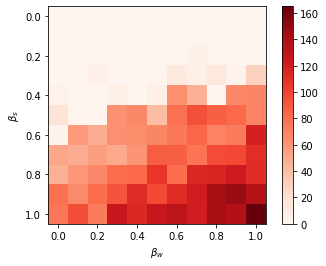

In [65]:
plt.imshow(matrix, cmap='Reds', interpolation='nearest')
plt.xlabel(r"$\beta_w$")
plt.ylabel(r"$\beta_s$")
plt.xticks(np.linspace(0,10,6), np.round(np.linspace(0,1,6),2))
plt.yticks(np.linspace(0,10,6), np.round(np.linspace(0,1,6),2))
plt.colorbar()
plt.savefig("tmp1.pdf")

In [22]:
process_one("private_attack_experiment_1/1-1-attacker.log")

ATT 153


(153, None)

In [59]:
np.linspace(0,10,6)

array([ 0.,  2.,  4.,  6.,  8., 10.])